# RECESS PROJECT 2021
2018 Crime Statistics By Category Of Crime Analysis

Group E1 


Data sources

2018 Crime Statistics By Category Of Crime Analysis csv file provided

# imports to be used

In [1]:
# importing the neccessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from plotly import __version__
# plotly to help us plot interactive graphs, cufflinks to link pandas to plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

# Reading data from the datasets 2018 Crime Statistics by Category of Crime¶

In [2]:
#  using set option attribute to display the rows and columns
pd.set_option('display.max_rows',127)
pd.set_option('display.max_columns',38)

In [3]:
#display the dataset given excluding the headers
df=pd.read_csv("2018CrimeStatisticsByCategoryOfCrime.csv",header=None,) 
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,NaN,NaN,REPORTED CASES,NaN,NaN,NaN,PERFOMANCE,NaN,NaN,NaN,NaN,PERSONS TAKEN TO COURT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SENTENCES IMPOSED BY COURTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACCUSED CHARGED,NaN,NaN,NaN,ACCUSED CONVICTED,NaN,NaN,NaN,NaN,NaN,NaN,IMPRISONMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VICTIMS OF CRIME,NaN,NaN,NaN,VALUE PROPERTY(UGSHS.),NaN
2,NaN,NaN,Totals Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court,Male Adult,Male Juven.,Female Adult,Female Juven.,Male Adult,Male Juven.,Female Adult,Female Juven.,Acquitted,Discharged,Awaiting Trial,Male Adult,Male Juven.,Female Adult,Female Juven.,Death,Fined,Probation Bound Over,CAUTION,COMM. WORK,Fines Awarded (UgShs.),Male Adult,Male Juven.,Female Adult,Female Juven.,Lost,Recovered
3,S/No.,CASE/CRIME INCIDENCES,1,2,3,4,5,6,7,8,9,10,NaN,NaN,NaN,11,NaN,NaN,NaN,12,13,14,NaN,NaN,NaN,15,16,17,18,19,20,21,NaN,NaN,NaN,22,23,24
4,NaN,HOMICIDES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,98,UWA Statute,648,112,89,447,485,269,8,26,144,609,7,17,-,377,-,11,-,10,42,193,249,3,4,-,-,107,-,15,10,172222000,608,-,8,-,26000000,26000000
124,99,Local Government Act,4,2,1,1,1,-,-,-,1,1,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,-,-,-,-,4,-,-,-,-,-
125,100,All other Acts,821,345,189,287,430,173,7,19,93,641,12,76,-,323,8,44,-,1,56,297,121,2,3,-,-,120,21,41,60,69060000,710,10,62,9,241790000,440000
126,NaN,Sub Total(Other Laws),3006,749,620,1637,1885,991,24,127,500,3592,49,416,138,2183,54,314,19,29,280,1316,1291,7,18,-,-,810,21,292,123,518202000,2676,10,115,9,274390000,26440000


# We shall start defining the column tuples and then use pandas methods to create pandas multilevel header

In [4]:
# listing of columns names of the dataset
columns=[
       ('REPORTED CASES','Total Cases'),('REPORTED CASES','Cases under Inquiry'),
    ('REPORTED CASES','Not Detected/NPW'),('REPORTED CASES','Cases taken to court'),
    
    ('PERFORMANCE','Cases submitted toDPP/RSA'),('PERFORMANCE','Cases with convictions'),
    ('PERFORMANCE','Cases with Acquittals'),('PERFORMANCE','Cases Dismissed'),
    ('PERFORMANCE','Cases pending in Court'),
    
    ('PERSONS TAKEN TO COURT','ACCUSED CHARGED','Male Adult'),('PERSONS TAKEN TO COURT','ACCUSED CHARGED','Male Juven.')
    ,('PERSONS TAKEN TO COURT','ACCUSED CHARGED','Female Adult'),('PERSONS TAKEN TO COURT','ACCUSED CHARGED','Female Juven.'),
    ('PERSONS TAKEN TO COURT','ACCUSED CONVICTED','Male Adult'),('PERSONS TAKEN TO COURT','ACCUSED CONVICTED','Male Juven.'),
    ('PERSONS TAKEN TO COURT','ACCUSED CONVICTED','Female Adult'), ('PERSONS TAKEN TO COURT','ACCUSED CONVICTED','Female Juven.'),
    ('PERSONS TAKEN TO COURT','ACCUSED CONVICTED','Acquitted'),('PERSONS TAKEN TO COURT','ACCUSED CONVICTED','Discharged'),
    ('PERSONS TAKEN TO COURT','ACCUSED CONVICTED','Awaiting Trial'),
    
    
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Male Adult'),
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Male Juven.')
    ,('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Female Adult')
    ,('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Female Juven.'),
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Death'),
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Fined'),
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Probation Bound Over'),
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','CAUTION'),
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','COMM. WORK'),
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Fines Awarded (UgShs.)'),
    ('SENTENCES IMPOSED BY COURTS','VICTIMS OF CRIME','Male Adult'),
    ('SENTENCES IMPOSED BY COURTS','VICTIMS OF CRIME','Male Juven.')
    ,('SENTENCES IMPOSED BY COURTS','VICTIMS OF CRIME','Female Adult'),
    ('SENTENCES IMPOSED BY COURTS','VICTIMS OF CRIME','Female Juven.'),
    ('SENTENCES IMPOSED BY COURTS','VALUE PROPERTY(UGSHS.)','Lost'),
    ('SENTENCES IMPOSED BY COURTS','VALUE PROPERTY(UGSHS.)','Recovered')
    
        ]
columns

[('REPORTED CASES', 'Total Cases'),
 ('REPORTED CASES', 'Cases under Inquiry'),
 ('REPORTED CASES', 'Not Detected/NPW'),
 ('REPORTED CASES', 'Cases taken to court'),
 ('PERFORMANCE', 'Cases submitted toDPP/RSA'),
 ('PERFORMANCE', 'Cases with convictions'),
 ('PERFORMANCE', 'Cases with Acquittals'),
 ('PERFORMANCE', 'Cases Dismissed'),
 ('PERFORMANCE', 'Cases pending in Court'),
 ('PERSONS TAKEN TO COURT', 'ACCUSED CHARGED', 'Male Adult'),
 ('PERSONS TAKEN TO COURT', 'ACCUSED CHARGED', 'Male Juven.'),
 ('PERSONS TAKEN TO COURT', 'ACCUSED CHARGED', 'Female Adult'),
 ('PERSONS TAKEN TO COURT', 'ACCUSED CHARGED', 'Female Juven.'),
 ('PERSONS TAKEN TO COURT', 'ACCUSED CONVICTED', 'Male Adult'),
 ('PERSONS TAKEN TO COURT', 'ACCUSED CONVICTED', 'Male Juven.'),
 ('PERSONS TAKEN TO COURT', 'ACCUSED CONVICTED', 'Female Adult'),
 ('PERSONS TAKEN TO COURT', 'ACCUSED CONVICTED', 'Female Juven.'),
 ('PERSONS TAKEN TO COURT', 'ACCUSED CONVICTED', 'Acquitted'),
 ('PERSONS TAKEN TO COURT', 'ACCUSED CON

In [5]:
# getting data from specific rows and columns 
dcf=df.loc[4:,2:]
dcf


,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,190,117,29,44,74,3,1,1,39,85,-,-,-,4,-,-,-,1,1,79,4,-,-,-,-,-,-,-,-,-,197,4,17,-,11500000,-
6,636,431,109,96,176,2,-,1,93,194,-,10,-,3,-,-,-,-,3,198,3,-,-,-,-,-,-,-,-,-,619,11,25,1,-,-
7,81,54,12,15,17,-,-,-,15,9,-,9,-,-,-,-,-,-,-,18,-,-,-,-,-,-,-,-,-,-,65,9,14,4,-,-
8,362,107,24,231,239,15,-,2,214,208,4,73,2,7,1,6,-,-,4,269,3,1,10,-,-,-,-,-,-,-,174,25,138,16,-,-
9,42,25,11,6,14,-,-,-,6,8,2,3,-,-,-,-,-,-,-,13,-,-,-,-,-,-,-,-,-,-,16,24,7,19,-,-
10,3186,1740,626,820,1259,25,2,8,785,1062,29,126,3,27,2,-,-,3,16,1172,26,1,-,-,-,1,-,-,1,-,2475,192,473,104,600000,-
11,4497,2474,811,1212,1779,45,3,12,1152,1566,35,221,5,41,3,6,-,4,24,1749,36,2,10,-,-,1,-,-,1,-,3546,265,674,144,12100000,-
12,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,199,172,19,8,48,3,-,-,5,10,-,1,-,5,-,-,-,-,-,6,4,-,-,-,-,1,-,-,-,3000000,178,-,13,-,54403285118,602281000


Now having identified the rows, indexes and column names lets create a list of multilevel index for the data provided to give it more meaning. We shall start defining the column tuples and then use pandas methods to create pandas multilevel header. Also we shall read data from specific rows and columns and add it to the dataframe we are creating.

In [6]:
# setting the column names as multiIndex 
dcf.columns=pd.MultiIndex.from_tuples(columns)
dcf

REPORTED CASES                                                            \
       Total Cases Cases under Inquiry Not Detected/NPW Cases taken to court   
               NaN                 NaN              NaN                  NaN   
4              NaN                 NaN              NaN                  NaN   
5              190                 117               29                   44   
6              636                 431              109                   96   
7               81                  54               12                   15   
8              362                 107               24                  231   
9               42                  25               11                    6   
10            3186                1740              626                  820   
11            4497                2474              811                 1212   
12               -                   -                -                    -   
13             199                 172               19                    8   
14              58                  49                6                    3   
15              50                  39               11                    -   
16             541                 215              159                  167   
17             898                 525              186                  187   
18             344                 221               80                   43   
19              17                  15                1                    1   
20           12313                5776             3936                 2601   
21             198                 142               40                   16   
22             345                 171              124                   50   
23             136                  86               13                   37   
24           15099                7411             4575                 3113   
25               -                   -                -                    -   
26               -                   -                -                    -   
27            1580                 618              318                  644   
28           15366                6166             3615                 5585   
29             396                 118              114                  164   
30              79                  29               34                   16   
31             100                  30               25                   45   
32           17521                6961             4106                 6454   
33               -                   -                -                    -   
34            6757                2499             3865                  393   
35            2299                 752             1430                  117   
36             245                  97               95                   53   
37              84                  33               25                   26   
38             612                 265              248                   99   
39            1449                 445              926                   78   
40              51                  13               21                   17   
41              92                  42               39                   11   
42           11589                4146             6649                  794   
43               -                   -                -                    -   
44            6867                2256             1511                 3100   
45            3368                1038              693                 1637   
46            2000                 670              390                  940   
47             447                 223               84                  140   
48            1336                 368              264                  704   
49           14018                4555             2942                 6521   
50               -                   -                -                    -   
51  

# Cleaning the datasets

# setting the indices 

In [7]:
# setting the indices 
dcf.index=[df[0][4:],df[1][4:]]
# setting the index names 
dcf.index.names=['S/No.','CASE/CRIME INCIDENCES']

# filling all the nan in the column with white space 
dcf.columns= pd.MultiIndex.from_frame(dcf.columns.to_frame().fillna(''))

# filling all the nan in the index with white space 
dcf.index= pd.MultiIndex.from_frame(dcf.index.to_frame().fillna(''))
# filling the nan in the rest with - to indicate either no value or entering into a different catergory
dcf.fillna('-',inplace=True)

dcf

0                                                  REPORTED CASES  \
1                                                     Total Cases   
2                                                                   
S/No. CASE/CRIME INCIDENCES                                         
      HOMICIDES                                                 -   
1     Death  (by shooting)                                    190   
2     Death (by mob action)                                   636   
3     Death (Poisoning)                                        81   
4     Death (Aggravated Domestic Violence)                    362   
5     Death(Fire Out Breaks)                                   42   
8     Other Death (Not Specified above)                      3186   
      Sub Total(Homicides)                                   4497   
      ECONOMIC CRIMES                                           -   
9     Embezzlement                                            199   
10    Causing Financial losss                                  58   
11    Abuse of office                                          50   
12    Counterfeiting                                          541   
13    Forgeries & Uttering of Documents                       898   
14    Issuing False Cheques                                   344   
15    Bank and Other Corporate Frauds                          17   
16    Obtaining By False Pretences                          12313   
17    Cyber (Computer) crimes                                 198   
18    Land Frauds                                             345   
19    Other Economic crimes                                   136   
      Sub Total(Economic crimes)                            15099   
      GENERAL CRIMES                                            -   
      (a) Sex Related Offences                                  -   
20    Rape                                                   1580   
21    Defilement                                            15366   
22    Indecent Assault                                        396   
23    Incest                                                   79   
24    Unnatural Offences                                      100   
      Sub Total(Sex Related)                                17521   
      (b) Child Related Offences                                -   
25    Child Neglect                                          6757   
26    Child Desertion                                        2299   
27    Child Stealing                                          245   
28    Child Trafficking                                        84   
29    Child Abduction/Kidnap                                  612   
31    Child Abuse/Torture                                    1449   
32    Infanticide                                              51   
33    Abortion                                                 92   
      Sub Total(Child Related)                              11589   
      (c ) Breakings                                            -   
34    Burglaries                                             6867   
35    House Breakings                                        3368   
36    Shop Breaking                                          2000   
37    Office Breaking                                         447   
38    Other Breakings (garage ,etc )                         1336   
      Sub Total(Breakings)                                  14018   
      (d) Thefts                                                -   
39    Theft of Motor Vehicles                                1200   
40    Theft of Motor Cycles                                  4612   
41    Theft from M/Vs (Spares)                               1093   
42    Theft from M/Vs (property)                              597   
43    Theft of Bicycles                                      1028   
44    Theft of Computers(Laptops)                             796   
45    Thefts of Mobile Phones                                6205  

In [8]:
# Then replacing all the unused cells with 0
dcf.replace('-',0,inplace=True)
# replacing the commas so as to enable us avoid having strings in the values
dcf.replace(',','', regex=True, inplace=True)
data = dcf.select_dtypes(object).columns
dcf[data] = dcf[data].apply(pd.to_numeric,errors='coerce')
#If 'coerce', then invalid parsing will be set as NaN..
dcf.abs()

#abs() function is used to return the absolute value of a number, i.e., it will remove the negative sign of the number

0                                                  REPORTED CASES  \
1                                                     Total Cases   
2                                                                   
S/No. CASE/CRIME INCIDENCES                                         
      HOMICIDES                                                 0   
1     Death  (by shooting)                                    190   
2     Death (by mob action)                                   636   
3     Death (Poisoning)                                        81   
4     Death (Aggravated Domestic Violence)                    362   
5     Death(Fire Out Breaks)                                   42   
8     Other Death (Not Specified above)                      3186   
      Sub Total(Homicides)                                   4497   
      ECONOMIC CRIMES                                           0   
9     Embezzlement                                            199   
10    Causing Financial losss                                  58   
11    Abuse of office                                          50   
12    Counterfeiting                                          541   
13    Forgeries & Uttering of Documents                       898   
14    Issuing False Cheques                                   344   
15    Bank and Other Corporate Frauds                          17   
16    Obtaining By False Pretences                          12313   
17    Cyber (Computer) crimes                                 198   
18    Land Frauds                                             345   
19    Other Economic crimes                                   136   
      Sub Total(Economic crimes)                            15099   
      GENERAL CRIMES                                            0   
      (a) Sex Related Offences                                  0   
20    Rape                                                   1580   
21    Defilement                                            15366   
22    Indecent Assault                                        396   
23    Incest                                                   79   
24    Unnatural Offences                                      100   
      Sub Total(Sex Related)                                17521   
      (b) Child Related Offences                                0   
25    Child Neglect                                          6757   
26    Child Desertion                                        2299   
27    Child Stealing                                          245   
28    Child Trafficking                                        84   
29    Child Abduction/Kidnap                                  612   
31    Child Abuse/Torture                                    1449   
32    Infanticide                                              51   
33    Abortion                                                 92   
      Sub Total(Child Related)                              11589   
      (c ) Breakings                                            0   
34    Burglaries                                             6867   
35    House Breakings                                        3368   
36    Shop Breaking                                          2000   
37    Office Breaking                                         447   
38    Other Breakings (garage ,etc )                         1336   
      Sub Total(Breakings)                                  14018   
      (d) Thefts                                                0   
39    Theft of Motor Vehicles                                1200   
40    Theft of Motor Cycles                                  4612   
41    Theft from M/Vs (Spares)                               1093   
42    Theft from M/Vs (property)                              597   
43    Theft of Bicycles                                      1028   
44    Theft of Computers(Laptops)                             796   
45    Thefts of Mobile Phones                                6205  

In [9]:
# lets now filter the rows that contains only a single value zero and replace it with the original 
# stucture of -
dcf[~dcf.any(axis = 1)]='-'
dcf.replace('-','',inplace=True)
dcf

0                                                  REPORTED CASES  \
1                                                     Total Cases   
2                                                                   
S/No. CASE/CRIME INCIDENCES                                         
      HOMICIDES                                                     
1     Death  (by shooting)                                    190   
2     Death (by mob action)                                   636   
3     Death (Poisoning)                                        81   
4     Death (Aggravated Domestic Violence)                    362   
5     Death(Fire Out Breaks)                                   42   
8     Other Death (Not Specified above)                      3186   
      Sub Total(Homicides)                                   4497   
      ECONOMIC CRIMES                                               
9     Embezzlement                                            199   
10    Causing Financial losss                                  58   
11    Abuse of office                                          50   
12    Counterfeiting                                          541   
13    Forgeries & Uttering of Documents                       898   
14    Issuing False Cheques                                   344   
15    Bank and Other Corporate Frauds                          17   
16    Obtaining By False Pretences                          12313   
17    Cyber (Computer) crimes                                 198   
18    Land Frauds                                             345   
19    Other Economic crimes                                   136   
      Sub Total(Economic crimes)                            15099   
      GENERAL CRIMES                                                
      (a) Sex Related Offences                                      
20    Rape                                                   1580   
21    Defilement                                            15366   
22    Indecent Assault                                        396   
23    Incest                                                   79   
24    Unnatural Offences                                      100   
      Sub Total(Sex Related)                                17521   
      (b) Child Related Offences                                    
25    Child Neglect                                          6757   
26    Child Desertion                                        2299   
27    Child Stealing                                          245   
28    Child Trafficking                                        84   
29    Child Abduction/Kidnap                                  612   
31    Child Abuse/Torture                                    1449   
32    Infanticide                                              51   
33    Abortion                                                 92   
      Sub Total(Child Related)                              11589   
      (c ) Breakings                                                
34    Burglaries                                             6867   
35    House Breakings                                        3368   
36    Shop Breaking                                          2000   
37    Office Breaking                                         447   
38    Other Breakings (garage ,etc )                         1336   
      Sub Total(Breakings)                                  14018   
      (d) Thefts                                                    
39    Theft of Motor Vehicles                                1200   
40    Theft of Motor Cycles                                  4612   
41    Theft from M/Vs (Spares)                               1093   
42    Theft from M/Vs (property)                              597   
43    Theft of Bicycles                                      1028   
44    Theft of Computers(Laptops)                             796   
45    Thefts of Mobile Phones                                6205  

# Visualizing and analyzing data under - (a) Sex Related Offences

# 1. Starting with performance¶

In [10]:
# Importing all columns that we assigned to Performance in the data set
Pf=dcf['PERFORMANCE']
Pf

,1,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court
,2,,,,,
S/No.,CASE/CRIME INCIDENCES,,,,,
,HOMICIDES,,,,,
1,Death (by shooting),74,3,1,1,39
2,Death (by mob action),176,2,0,1,93
3,Death (Poisoning),17,0,0,0,15
4,Death (Aggravated Domestic Violence),239,15,0,2,214
5,Death(Fire Out Breaks),14,0,0,0,6
8,Other Death (Not Specified above),1259,25,2,8,785
,Sub Total(Homicides),1779,45,3,12,1152


In [11]:
# importing crimes under General Crimes with performance section in particular
Generals=Pf[22:94]
Generals

1                                                  Cases submitted toDPP/RSA  \
2                                                                              
S/No. CASE/CRIME INCIDENCES                                                    
      (a) Sex Related Offences                                                 
20    Rape                                                               798   
21    Defilement                                                        8179   
22    Indecent Assault                                                   199   
23    Incest                                                              21   
24    Unnatural Offences                                                  59   
      Sub Total(Sex Related)                                            9256   
      (b) Child Related Offences                                               
25    Child Neglect                                                      877   
26    Child Desertion                                                    194   
27    Child Stealing                                                      77   
28    Child Trafficking                                                   39   
29    Child Abduction/Kidnap                                             180   
31    Child Abuse/Torture                                                243   
32    Infanticide                                                         23   
33    Abortion                                                            16   
      Sub Total(Child Related)                                          1649   
      (c ) Breakings                                                           
34    Burglaries                                                        3906   
35    House Breakings                                                   1933   
36    Shop Breaking                                                     1224   
37    Office Breaking                                                    210   
38    Other Breakings (garage ,etc )                                     818   
      Sub Total(Breakings)                                              8091   
      (d) Thefts                                                               
39    Theft of Motor Vehicles                                            545   
40    Theft of Motor Cycles                                             2195   
41    Theft from M/Vs (Spares)                                           515   
42    Theft from M/Vs (property)                                         262   
43    Theft of Bicycles                                                  502   
44    Theft of Computers(Laptops)                                        358   
45    Thefts of Mobile Phones                                           2896   
46    Theft of Bank Cash in Transit                                        0   
47    Thefts of Cash                                                    3414   
48    Cattle Stealing                                                   3952   
49    Theft of Telecom,Electrical & Comm Items                            77   
50    Theft of Railway Slippers/Material                                   2   
51    Receiving & Retaining(Stolen Prop)                                 261   
52    Theft (property snatching-Bags,Neckless,etc)                        49   
53    Theft of all  kinds (General )                                   16977   
      Sub Total(Thefts)                                                32005   
      (e) Robberies                                                            
54    Aggravated Robbery(Motor Cycles)                                   196   
55    Aggravated Robbery(Motor Vehicles)                                  30   
56    Aggravated Robbery(Cash)                                           161   
57    Aggravated   Robbery(general)                                      581   
58    Cattle Rustling                                                          


In [12]:
# specific column for (a) Sex Related Offence(Performance) and converting the whole data to integers
sex=Generals[1:7].astype(int)
sex

,1,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court
,2,,,,,
S/No.,CASE/CRIME INCIDENCES,,,,,
20,Rape,798,16,1,7,620
21,Defilement,8179,840,46,429,4270
22,Indecent Assault,199,54,3,22,85
23,Incest,21,5,0,5,6
24,Unnatural Offences,59,5,0,10,30
,Sub Total(Sex Related),9256,920,50,473,5011


##### 

In [13]:
#displaying the Sub Total((a) Sex Related Offences) under Performance
SubTotal=sex[5:]
SubTotal

,1,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court
,2,,,,,
S/No.,CASE/CRIME INCIDENCES,,,,,
,Sub Total(Sex Related),9256,920,50,473,5011


In [14]:
# Getting the total sum of (a) Sex Related Offences of the Subtotal
TotalSum=SubTotal.sum(axis=1)
TotalSum

S/No.  CASE/CRIME INCIDENCES 
       Sub Total(Sex Related)    15710
dtype: int64

<AxesSubplot:title={'center':'A histogram to show the relationship between performance and (a) Sex Related Offences)'}, ylabel='Frequency'>

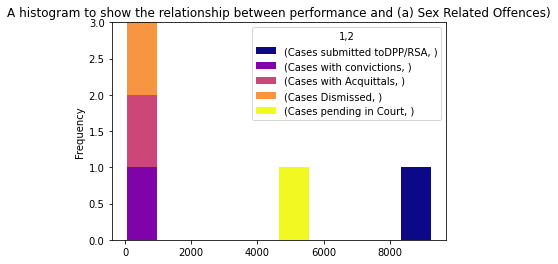

In [15]:
# Histogram for the subTotal obtained under (a) Sex Related Offences
SubTotal.plot.hist(stacked=True, cmap='plasma',xlabel='Number of Cases' ,title='A histogram to show the relationship between performance and (a) Sex Related Offences)')

In [16]:
# Actual Crimes under (a) Sex Related Offences when sub total is removed
related=sex[0:5]
related

,1,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court
,2,,,,,
S/No.,CASE/CRIME INCIDENCES,,,,,
20,Rape,798,16,1,7,620
21,Defilement,8179,840,46,429,4270
22,Indecent Assault,199,54,3,22,85
23,Incest,21,5,0,5,6
24,Unnatural Offences,59,5,0,10,30


In [17]:
# Displaying the sum of values of other crimes to be ploted on the graph by summing up all their respective columns
ByCat=related.sum(axis=1)
ByCat

S/No.  CASE/CRIME INCIDENCES
20     Rape                      1442
21     Defilement               13764
22     Indecent Assault           363
23     Incest                      37
24     Unnatural Offences         104
dtype: int64

<AxesSubplot:title={'center':'A bar graph showing Cases(Performance) under Sex related cases'}, xlabel='Category', ylabel='Number of CRIME INCIDENCES'>

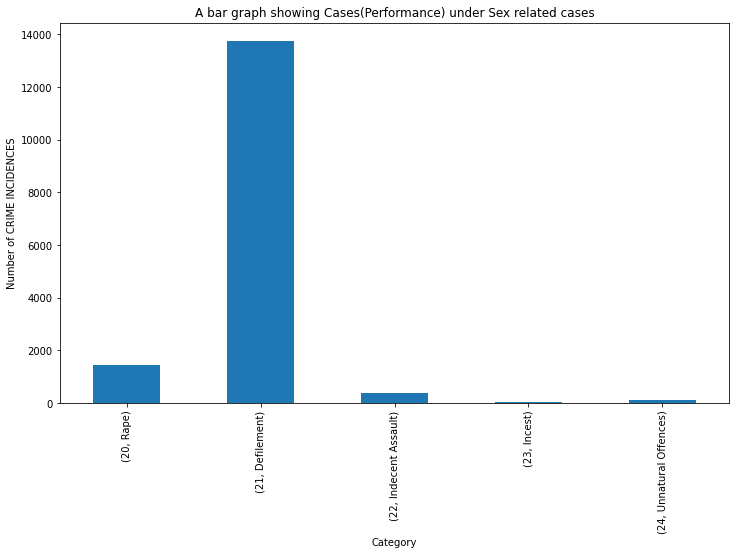

In [18]:
#Bargraph for Sex related offences with crime incidences
ByCat.plot.bar(figsize=(12,7),title='A bar graph showing Cases(Performance) under Sex related cases',ylabel='Number of CRIME INCIDENCES',xlabel='Category')

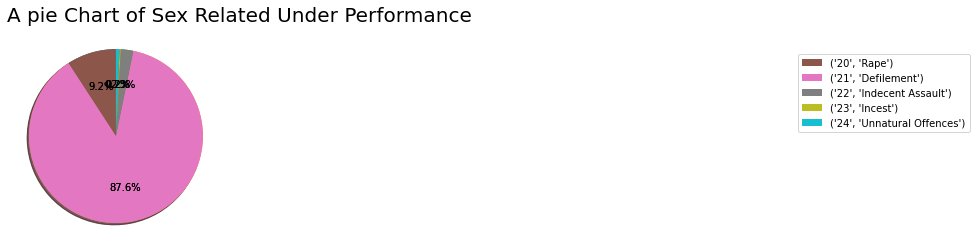

In [19]:
labels = list(ByCat.keys())
values = ByCat.values.tolist()
# Creating plot
fig1, ax1 = plt.subplots()
ax1.pie(values, autopct='%1.1f%%',shadow=True, startangle=90)
patches, texts, auto = ax1.pie(values, shadow=True, startangle=90, autopct='%1.1f%%')

#add justing the position of the legend on the pie char
plt.legend(patches, labels, bbox_to_anchor=(2.5,0.5), loc="lower right",bbox_transform=plt.gcf().transFigure)

#setting the title,its position and the fontsize
plt.title('A pie Chart of Sex Related Under Performance', loc='left',fontsize=20)

# show plot
plt.show()

From the above summation,pie-chart and graph, we can deduct that   Defilement had the highest number of crime incidences with an unspecified cause followed by Rape, Indecent Assault,  Unnatural Offences and finally Incest with the least record

In [20]:
#Determining the correlation of the Sex related Offences under performance
related.corr()

,1,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court
,2,,,,,
1,2,,,,,
Cases submitted toDPP/RSA,,1.000000,0.995080,0.995394,0.995057,0.998721
Cases with convictions,,0.995080,1.000000,0.999960,0.999676,0.989034
Cases with Acquittals,,0.995394,0.999960,1.000000,0.999455,0.989644
Cases Dismissed,,0.995057,0.999676,0.999455,1.000000,0.988789
Cases pending in Court,,0.998721,0.989034,0.989644,0.988789,1.000000


In [21]:
#Describing the Sex Related offences by performance
related.describe()

1,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court
2,,,,,
count,5.000000,5.000000,5.000000,5.000000,5.00000
mean,1851.200000,184.000000,10.000000,94.600000,1002.20000
std,3551.114642,367.267614,20.161845,187.051597,1844.14186
min,21.000000,5.000000,0.000000,5.000000,6.00000
25%,59.000000,5.000000,0.000000,7.000000,30.00000
50%,199.000000,16.000000,1.000000,10.000000,85.00000
75%,798.000000,54.000000,3.000000,22.000000,620.00000
max,8179.000000,840.000000,46.000000,429.000000,4270.00000


In [22]:
# Line graph for the Sex Related Offences with accordance to performance
related.iplot(kind='line',title='A line graph showing the relationship amongst Sex Related Offences with accordance to performance')

In [23]:
# Line graph for the Sex Related Offences with accordance to performance
related.iplot(kind='bar',title='A bar graph showing the relationship amongst Sex Related Offences with accordance to performance')

From the above line and bar graph, we can deduct that defilement cases had the highest numbers reported to court and DPP/RSA
Cases of Rape we mostly reported to court and DPP/RSA

Incest and unnatural offences had the least number of crimes submitted to court and DPP/RSA


# 2. PERSONS TAKEN TO COURT under (a) Sex Related Offences  ¶

In [24]:
#Importing the mother column (PERSONS TAKEN TO COURT) and all its sub-columns
PTC=dcf['PERSONS TAKEN TO COURT']
PTC

1                                                  ACCUSED CHARGED  \
2                                                       Male Adult   
S/No. CASE/CRIME INCIDENCES                                          
      HOMICIDES                                                      
1     Death  (by shooting)                                      85   
2     Death (by mob action)                                    194   
3     Death (Poisoning)                                          9   
4     Death (Aggravated Domestic Violence)                     208   
5     Death(Fire Out Breaks)                                     8   
8     Other Death (Not Specified above)                       1062   
      Sub Total(Homicides)                                    1566   
      ECONOMIC CRIMES                                                
9     Embezzlement                                              10   
10    Causing Financial losss                                    3   
11    Abuse of office                                            0   
12    Counterfeiting                                           199   
13    Forgeries & Uttering of Documents                        196   
14    Issuing False Cheques                                     42   
15    Bank and Other Corporate Frauds                            2   
16    Obtaining By False Pretences                            2532   
17    Cyber (Computer) crimes                                   12   
18    Land Frauds                                               66   
19    Other Economic crimes                                     50   
      Sub Total(Economic crimes)                              3112   
      GENERAL CRIMES                                                 
      (a) Sex Related Offences                                       
20    Rape                                                     584   
21    Defilement                                              5199   
22    Indecent Assault                                         158   
23    Incest                                                    16   
24    Unnatural Offences                                        42   
      Sub Total(Sex Related)                                  5999   
      (b) Child Related Offences                                     
25    Child Neglect                                            343   
26    Child Desertion                                           58   
27    Child Stealing                                            21   
28    Child Trafficking                                         17   
29    Child Abduction/Kidnap                                    86   
31    Child Abuse/Torture                                       62   
32    Infanticide                                                1   
33    Abortion                                                   5   
      Sub Total(Child Related)                                 593   
      (c ) Breakings                                                 
34    Burglaries                                              3286   
35    House Breakings                                         1641   
36    Shop Breaking                                           1128   
37    Office Breaking                                          185   
38    Other Breakings (garage ,etc )                           870   
      Sub Total(Breakings)                                    7110   
      (d) Thefts                                                     
39    Theft of Motor Vehicles                                  305   
40    Theft of Motor Cycles                                   1664   
41    Theft from M/Vs (Spares)                                 410   
42    Theft from M/Vs (property)                               207   
43    Theft of Bicycles                                        451   
44    Theft of Computers(Laptops)                              233   
45    Thefts of Mobile Phones                                 1953   
46    Thef

# 2a)Accused convicted

In [25]:
#Picking Up only the Accused convicted under under PERSONS TAKEN TO COURT
PTC=PTC['ACCUSED CONVICTED']
PTC

2                                                  Male Adult Male Juven.  \
S/No. CASE/CRIME INCIDENCES                                                 
      HOMICIDES                                                             
1     Death  (by shooting)                                  4           0   
2     Death (by mob action)                                 3           0   
3     Death (Poisoning)                                     0           0   
4     Death (Aggravated Domestic Violence)                  7           1   
5     Death(Fire Out Breaks)                                0           0   
8     Other Death (Not Specified above)                    27           2   
      Sub Total(Homicides)                                 41           3   
      ECONOMIC CRIMES                                                       
9     Embezzlement                                          5           0   
10    Causing Financial losss                               0           0   
11    Abuse of office                                       0           0   
12    Counterfeiting                                       55           1   
13    Forgeries & Uttering of Documents                    51           0   
14    Issuing False Cheques                                 9           0   
15    Bank and Other Corporate Frauds                       0           0   
16    Obtaining By False Pretences                        771           3   
17    Cyber (Computer) crimes                               3           3   
18    Land Frauds                                           6           0   
19    Other Economic crimes                                 5           0   
      Sub Total(Economic crimes)                          905           7   
      GENERAL CRIMES                                                        
      (a) Sex Related Offences                                              
20    Rape                                                 12           1   
21    Defilement                                          714         129   
22    Indecent Assault                                     48           5   
23    Incest                                                5           0   
24    Unnatural Offences                                    5           0   
      Sub Total(Sex Related)                              784         135   
      (b) Child Related Offences                                            
25    Child Neglect                                       103           0   
26    Child Desertion                                      24           0   
27    Child Stealing                                        3           0   
28    Child Trafficking                                     0           0   
29    Child Abduction/Kidnap                               11           0   
31    Child Abuse/Torture                                  25           0   
32    Infanticide                                           0           0   
33    Abortion                                              2           0   
      Sub Total(Child Related)                            168           0   
      (c ) Breakings                                                        
34    Burglaries                                          876          43   
35    House Breakings                                     449          23   
36    Shop Breaking                                       267           7   
37    Office Breaking                                      40           1   
38    Other Breakings (garage ,etc )                      218          10   
      Sub Total(Breakings)                               1850          84   
      (d) Thefts                                                            
39    Theft of Motor Vehicles                              59           0   
40    Theft of Motor Cycles                               355           8   
41    Theft from M/Vs (Spares)                            110           3

In [26]:
# importing ACCUSED CONVICTED under Sex Related Offences
Accusedconvicted=PTC[22:94]
Accusedconvicted

2                                                  Male Adult Male Juven.  \
S/No. CASE/CRIME INCIDENCES                                                 
      (a) Sex Related Offences                                              
20    Rape                                                 12           1   
21    Defilement                                          714         129   
22    Indecent Assault                                     48           5   
23    Incest                                                5           0   
24    Unnatural Offences                                    5           0   
      Sub Total(Sex Related)                              784         135   
      (b) Child Related Offences                                            
25    Child Neglect                                       103           0   
26    Child Desertion                                      24           0   
27    Child Stealing                                        3           0   
28    Child Trafficking                                     0           0   
29    Child Abduction/Kidnap                               11           0   
31    Child Abuse/Torture                                  25           0   
32    Infanticide                                           0           0   
33    Abortion                                              2           0   
      Sub Total(Child Related)                            168           0   
      (c ) Breakings                                                        
34    Burglaries                                          876          43   
35    House Breakings                                     449          23   
36    Shop Breaking                                       267           7   
37    Office Breaking                                      40           1   
38    Other Breakings (garage ,etc )                      218          10   
      Sub Total(Breakings)                               1850          84   
      (d) Thefts                                                            
39    Theft of Motor Vehicles                              59           0   
40    Theft of Motor Cycles                               355           8   
41    Theft from M/Vs (Spares)                            110           3   
42    Theft from M/Vs (property)                           65           0   
43    Theft of Bicycles                                   171           9   
44    Theft of Computers(Laptops)                          73           3   
45    Thefts of Mobile Phones                             657          45   
46    Theft of Bank Cash in Transit                        11           0   
47    Thefts of Cash                                      720          15   
48    Cattle Stealing                                    1233          20   
49    Theft of Telecom,Electrical & Comm Items             28           0   
50    Theft of Railway Slippers/Material                    1           0   
51    Receiving & Retaining(Stolen Prop)                   78           1   
52    Theft (property snatching-Bags,Neckless,etc)         18           2   
53    Theft of all  kinds (General )                     4987         211   
      Sub Total(Thefts)                                  8566         317   
      (e) Robberies                                                         
54    Aggravated Robbery(Motor Cycles)                      5           0   
55    Aggravated Robbery(Motor Vehicles)                    0           0   
56    Aggravated Robbery(Cash)                              1           0   
57    Aggravated   Robbery(general)                        34           0   
58    Cattle Rustling                                                       
59    Simple Robbery(general)                             352          20   
      Sub Total(Robberies)                                392          20   
      (f) Assaults                                                       

In [27]:
# specific column for Sex Related Offences and converting the whole data object to integers
offence=Accusedconvicted[1:7].astype(int)
offence

,2,Male Adult,Male Juven.,Female Adult,Female Juven.,Acquitted,Discharged,Awaiting Trial
S/No.,CASE/CRIME INCIDENCES,,,,,,,
20,Rape,12,1,0,0,1,7,575
21,Defilement,714,129,3,105,52,415,4329
22,Indecent Assault,48,5,4,0,3,22,84
23,Incest,5,0,3,0,0,4,11
24,Unnatural Offences,5,0,0,0,0,10,32
,Sub Total(Sex Related),784,135,10,105,56,458,5031


In [28]:
#displaying the Sub Total(Sex Related Offences)
SubTotal=offence[5:]
SubTotal

,2,Male Adult,Male Juven.,Female Adult,Female Juven.,Acquitted,Discharged,Awaiting Trial
S/No.,CASE/CRIME INCIDENCES,,,,,,,
,Sub Total(Sex Related),784,135,10,105,56,458,5031


In [29]:
# Getting the total sum of Other Crimes-gen(Sex Related Offence)
TotalSum=SubTotal.sum(axis=1)
TotalSum

S/No.  CASE/CRIME INCIDENCES 
       Sub Total(Sex Related)    6579
dtype: int64

In [30]:
# Actual Crimes under (a) Sex Related Offences when sub total is removed
relate=offence[0:5]
relate

,2,Male Adult,Male Juven.,Female Adult,Female Juven.,Acquitted,Discharged,Awaiting Trial
S/No.,CASE/CRIME INCIDENCES,,,,,,,
20,Rape,12,1,0,0,1,7,575
21,Defilement,714,129,3,105,52,415,4329
22,Indecent Assault,48,5,4,0,3,22,84
23,Incest,5,0,3,0,0,4,11
24,Unnatural Offences,5,0,0,0,0,10,32


In [31]:
# Displaying the sum of values of other crimes to be ploted on the graph
ByCat=relate.sum(axis=1)
ByCat

S/No.  CASE/CRIME INCIDENCES
20     Rape                      596
21     Defilement               5747
22     Indecent Assault          166
23     Incest                     23
24     Unnatural Offences         47
dtype: int64

<AxesSubplot:title={'center':'A bar graph showing Cases under Sex Related Offence for the accused convicted'}, xlabel='Sex Related Cases)', ylabel='Number of CRIME INCIDENCES'>

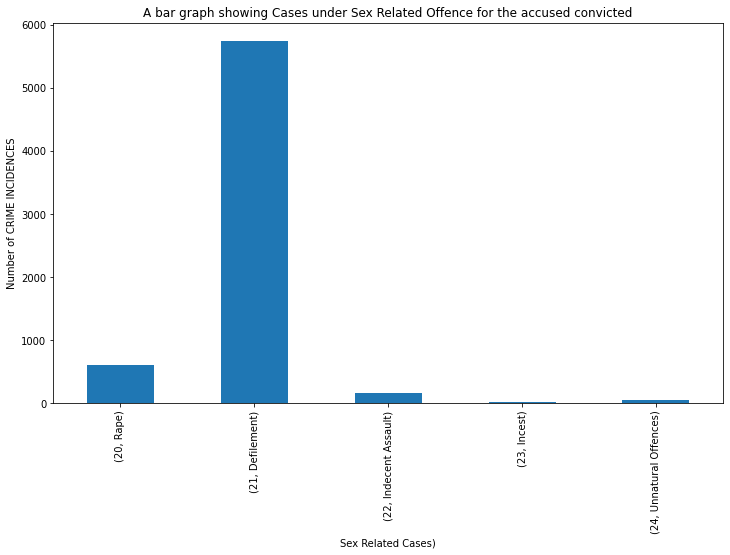

In [32]:
#Bargraph for Sex Related Offence for the accused convicted
ByCat.plot.bar(figsize=(12,7),title='A bar graph showing Cases under Sex Related Offence for the accused convicted',ylabel='Number of CRIME INCIDENCES',xlabel='Sex Related Cases)')

From the above bar graph, we can deduct that most Sex Related Offences fall under Defilement with unknown reasons followed by Rape, Indecent Assault, Unnatural Offences and finally Incest with the least record


In [33]:
#Determining the correlation of the  Sex Related by Cases convicted
relate.corr()

2,Male Adult,Male Juven.,Female Adult,Female Juven.,Acquitted,Discharged,Awaiting Trial
2,,,,,,,
Male Adult,1.000000,0.999776,0.334511,0.998364,0.999945,0.999678,0.990168
Male Juven.,0.999776,1.000000,0.320862,0.999347,0.999828,0.999906,0.991495
Female Adult,0.334511,0.320862,1.000000,0.298807,0.327630,0.316875,0.235144
Female Juven.,0.998364,0.999347,0.298807,1.000000,0.998561,0.999287,0.992279
Acquitted,0.999945,0.999828,0.327630,0.998561,1.000000,0.999664,0.991582
Discharged,0.999678,0.999906,0.316875,0.999287,0.999664,1.000000,0.990604
Awaiting Trial,0.990168,0.991495,0.235144,0.992279,0.991582,0.990604,1.000000


In [34]:
#Describing the Sex Related by Cases convicted
relate.describe()

2,Male Adult,Male Juven.,Female Adult,Female Juven.,Acquitted,Discharged,Awaiting Trial
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,156.800000,27.000000,2.000000,21.000000,11.200000,91.600000,1006.200000
std,311.994711,57.056989,1.870829,46.957428,22.840753,180.915173,1871.955849
min,5.000000,0.000000,0.000000,0.000000,0.000000,4.000000,11.000000
25%,5.000000,0.000000,0.000000,0.000000,0.000000,7.000000,32.000000
50%,12.000000,1.000000,3.000000,0.000000,1.000000,10.000000,84.000000
75%,48.000000,5.000000,3.000000,0.000000,3.000000,22.000000,575.000000
max,714.000000,129.000000,4.000000,105.000000,52.000000,415.000000,4329.000000


In [35]:
# Plotting a Line graph for Child related cases for accused charged cases
relate.iplot(kind='line',title='A line graph showing the relationship amongst Sex related offences')

In [36]:
# Plotting a bar graph for Child related cases for accused convicted cases
relate.iplot(kind='bar',title='A bar graph showing the relationship amongst Sex related offences')

From the above line and bar graph, we can deduct that under the Sex Related Offences, male adults are responsable for the highest Defilement and Rape cases recorded with an unspecified reasons followed by male juven and finally female juven

People are least likely to commit incest as defilement

Number of cases awaiting trial are so high meaning justice is served is often delayed


# 2b) ACCUSED CHARGED

In [37]:
#Importing presons taken to court under accused charged
PA=dcf['PERSONS TAKEN TO COURT']
PA

1                                                  ACCUSED CHARGED  \
2                                                       Male Adult   
S/No. CASE/CRIME INCIDENCES                                          
      HOMICIDES                                                      
1     Death  (by shooting)                                      85   
2     Death (by mob action)                                    194   
3     Death (Poisoning)                                          9   
4     Death (Aggravated Domestic Violence)                     208   
5     Death(Fire Out Breaks)                                     8   
8     Other Death (Not Specified above)                       1062   
      Sub Total(Homicides)                                    1566   
      ECONOMIC CRIMES                                                
9     Embezzlement                                              10   
10    Causing Financial losss                                    3   
11    Abuse of office                                            0   
12    Counterfeiting                                           199   
13    Forgeries & Uttering of Documents                        196   
14    Issuing False Cheques                                     42   
15    Bank and Other Corporate Frauds                            2   
16    Obtaining By False Pretences                            2532   
17    Cyber (Computer) crimes                                   12   
18    Land Frauds                                               66   
19    Other Economic crimes                                     50   
      Sub Total(Economic crimes)                              3112   
      GENERAL CRIMES                                                 
      (a) Sex Related Offences                                       
20    Rape                                                     584   
21    Defilement                                              5199   
22    Indecent Assault                                         158   
23    Incest                                                    16   
24    Unnatural Offences                                        42   
      Sub Total(Sex Related)                                  5999   
      (b) Child Related Offences                                     
25    Child Neglect                                            343   
26    Child Desertion                                           58   
27    Child Stealing                                            21   
28    Child Trafficking                                         17   
29    Child Abduction/Kidnap                                    86   
31    Child Abuse/Torture                                       62   
32    Infanticide                                                1   
33    Abortion                                                   5   
      Sub Total(Child Related)                                 593   
      (c ) Breakings                                                 
34    Burglaries                                              3286   
35    House Breakings                                         1641   
36    Shop Breaking                                           1128   
37    Office Breaking                                          185   
38    Other Breakings (garage ,etc )                           870   
      Sub Total(Breakings)                                    7110   
      (d) Thefts                                                     
39    Theft of Motor Vehicles                                  305   
40    Theft of Motor Cycles                                   1664   
41    Theft from M/Vs (Spares)                                 410   
42    Theft from M/Vs (property)                               207   
43    Theft of Bicycles                                        451   
44    Theft of Computers(Laptops)                              233   
45    Thefts of Mobile Phones                                 1953   
46    Thef

In [38]:
#Importing data about ACCUSED CHARGED
PC=PA['ACCUSED CHARGED']
PC

2                                                  Male Adult Male Juven.  \
S/No. CASE/CRIME INCIDENCES                                                 
      HOMICIDES                                                             
1     Death  (by shooting)                                 85           0   
2     Death (by mob action)                               194           0   
3     Death (Poisoning)                                     9           0   
4     Death (Aggravated Domestic Violence)                208           4   
5     Death(Fire Out Breaks)                                8           2   
8     Other Death (Not Specified above)                  1062          29   
      Sub Total(Homicides)                               1566          35   
      ECONOMIC CRIMES                                                       
9     Embezzlement                                         10           0   
10    Causing Financial losss                               3           0   
11    Abuse of office                                       0           0   
12    Counterfeiting                                      199           1   
13    Forgeries & Uttering of Documents                   196           0   
14    Issuing False Cheques                                42           0   
15    Bank and Other Corporate Frauds                       2           0   
16    Obtaining By False Pretences                       2532          13   
17    Cyber (Computer) crimes                              12           3   
18    Land Frauds                                          66           1   
19    Other Economic crimes                                50           1   
      Sub Total(Economic crimes)                         3112          19   
      GENERAL CRIMES                                                        
      (a) Sex Related Offences                                              
20    Rape                                                584          12   
21    Defilement                                         5199         379   
22    Indecent Assault                                    158           3   
23    Incest                                               16           0   
24    Unnatural Offences                                   42           4   
      Sub Total(Sex Related)                             5999         398   
      (b) Child Related Offences                                            
25    Child Neglect                                       343           0   
26    Child Desertion                                      58           1   
27    Child Stealing                                       21           1   
28    Child Trafficking                                    17           0   
29    Child Abduction/Kidnap                               86           0   
31    Child Abuse/Torture                                  62           0   
32    Infanticide                                           1           0   
33    Abortion                                              5           0   
      Sub Total(Child Related)                            593           2   
      (c ) Breakings                                                        
34    Burglaries                                         3286         141   
35    House Breakings                                    1641          98   
36    Shop Breaking                                      1128          42   
37    Office Breaking                                     185           4   
38    Other Breakings (garage ,etc )                      870          35   
      Sub Total(Breakings)                               7110         320   
      (d) Thefts                                                            
39    Theft of Motor Vehicles                             305           0   
40    Theft of Motor Cycles                              1664          18   
41    Theft from M/Vs (Spares)                            410          12

In [39]:
# importing the Accused charged under the General crimes
Accusedcharge=PC[22:94]
Accusedcharge 

2                                                  Male Adult Male Juven.  \
S/No. CASE/CRIME INCIDENCES                                                 
      (a) Sex Related Offences                                              
20    Rape                                                584          12   
21    Defilement                                         5199         379   
22    Indecent Assault                                    158           3   
23    Incest                                               16           0   
24    Unnatural Offences                                   42           4   
      Sub Total(Sex Related)                             5999         398   
      (b) Child Related Offences                                            
25    Child Neglect                                       343           0   
26    Child Desertion                                      58           1   
27    Child Stealing                                       21           1   
28    Child Trafficking                                    17           0   
29    Child Abduction/Kidnap                               86           0   
31    Child Abuse/Torture                                  62           0   
32    Infanticide                                           1           0   
33    Abortion                                              5           0   
      Sub Total(Child Related)                            593           2   
      (c ) Breakings                                                        
34    Burglaries                                         3286         141   
35    House Breakings                                    1641          98   
36    Shop Breaking                                      1128          42   
37    Office Breaking                                     185           4   
38    Other Breakings (garage ,etc )                      870          35   
      Sub Total(Breakings)                               7110         320   
      (d) Thefts                                                            
39    Theft of Motor Vehicles                             305           0   
40    Theft of Motor Cycles                              1664          18   
41    Theft from M/Vs (Spares)                            410          12   
42    Theft from M/Vs (property)                          207           5   
43    Theft of Bicycles                                   451          22   
44    Theft of Computers(Laptops)                         233          11   
45    Thefts of Mobile Phones                            1953         108   
46    Theft of Bank Cash in Transit                         0           0   
47    Thefts of Cash                                     2232          55   
48    Cattle Stealing                                    4075          71   
49    Theft of Telecom,Electrical & Comm Items             94           0   
50    Theft of Railway Slippers/Material                    2           0   
51    Receiving & Retaining(Stolen Prop)                  226           3   
52    Theft (property snatching-Bags,Neckless,etc)         50           3   
53    Theft of all  kinds (General )                    13097         517   
      Sub Total(Thefts)                                 24999         825   
      (e) Robberies                                                         
54    Aggravated Robbery(Motor Cycles)                    158           4   
55    Aggravated Robbery(Motor Vehicles)                   10           0   
56    Aggravated Robbery(Cash)                            155           0   
57    Aggravated   Robbery(general)                       543          11   
58    Cattle Rustling                                                       
59    Simple Robbery(general)                            1755          92   
      Sub Total(Robberies)                               2621         107   
      (f) Assaults                                                       

In [40]:
# specific column for rows and columns Other Crimes in General and converting the objects to integer
Accusedcharge=Accusedcharge[1:7].astype(int)
Accusedcharge 

,2,Male Adult,Male Juven.,Female Adult,Female Juven.
S/No.,CASE/CRIME INCIDENCES,,,,
20,Rape,584,12,0,0
21,Defilement,5199,379,22,147
22,Indecent Assault,158,3,5,0
23,Incest,16,0,7,0
24,Unnatural Offences,42,4,1,0
,Sub Total(Sex Related),5999,398,35,147


In [41]:
#displaying the Sub Total(Other Crimes-gen(sex related)) under Accused charged
SubTotal=Accusedcharge[5:]
SubTotal

,2,Male Adult,Male Juven.,Female Adult,Female Juven.
S/No.,CASE/CRIME INCIDENCES,,,,
,Sub Total(Sex Related),5999,398,35,147


<AxesSubplot:title={'center':'A histogram to show the relationship between performance and other crimes in general(Child related)'}, ylabel='Frequency'>

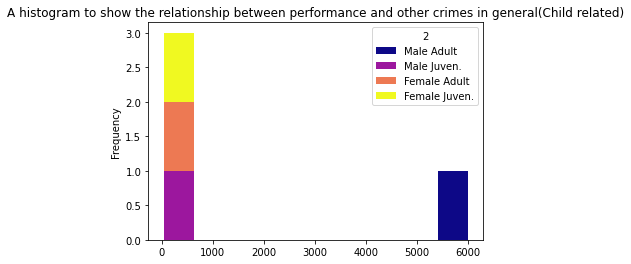

In [42]:
SubTotal.plot.hist(stacked=True, cmap='plasma',xlabel='Number of Cases' ,title='A histogram to show the relationship between performance and other crimes in general(Child related)')

In [43]:
# Actual Crimes under (a) Sex Related Offences when sub total is removed
relate=Accusedcharge[0:5]
relate

,2,Male Adult,Male Juven.,Female Adult,Female Juven.
S/No.,CASE/CRIME INCIDENCES,,,,
20,Rape,584,12,0,0
21,Defilement,5199,379,22,147
22,Indecent Assault,158,3,5,0
23,Incest,16,0,7,0
24,Unnatural Offences,42,4,1,0


In [44]:
# Displaying the sum of values of other crimes to be ploted on the graph
ByCat=relate.sum(axis=1)
ByCat

S/No.  CASE/CRIME INCIDENCES
20     Rape                      596
21     Defilement               5747
22     Indecent Assault          166
23     Incest                     23
24     Unnatural Offences         47
dtype: int64

<AxesSubplot:title={'center':'A bar graph showing Cases(Performance) under Assaults'}, xlabel='Sex Related Cases)', ylabel='Number of CRIME INCIDENCES'>

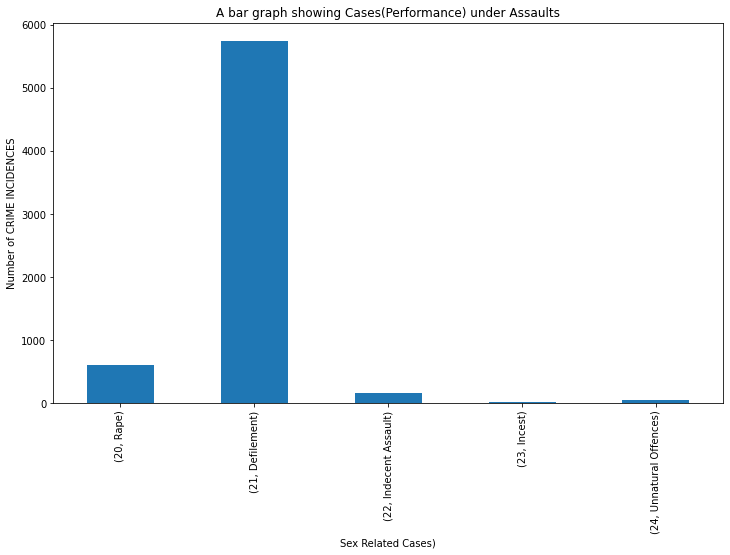

In [45]:
#Bargraph for Sex related offences
ByCat.plot.bar(figsize=(12,7),title='A bar graph showing Cases(Performance) under Assaults',ylabel='Number of CRIME INCIDENCES',xlabel='Sex Related Cases)')

We can deduce defilement cases almost reached a mark of 6000 in the year 2018, rape was at a mark of almost 500

Incest was least recorded in the year 2018



In [46]:
#Determining the correlation of the  Sex Related by Accused charged
relate.corr()

2,Male Adult,Male Juven.,Female Adult,Female Juven.
2,,,,
Male Adult,1.000000,0.997046,0.920735,0.994837
Male Juven.,0.997046,1.000000,0.938878,0.999649
Female Adult,0.920735,0.938878,1.000000,0.946415
Female Juven.,0.994837,0.999649,0.946415,1.000000


In [47]:
#Describing the Sex Related by Accused charged
relate.describe()

2,Male Adult,Male Juven.,Female Adult,Female Juven.
count,5.000000,5.000000,5.000000,5.000000
mean,1199.800000,79.600000,7.000000,29.400000
std,2247.222775,167.428492,8.860023,65.740399
min,16.000000,0.000000,0.000000,0.000000
25%,42.000000,3.000000,1.000000,0.000000
50%,158.000000,4.000000,5.000000,0.000000
75%,584.000000,12.000000,7.000000,0.000000
max,5199.000000,379.000000,22.000000,147.000000


In [48]:
# Line graph for the Accused charged in sex related offences
relate.iplot(kind='line',title='A line graph showing the relationship amongst Accused charged')

In [49]:
# Plotting a bar graph for ActualOtherCrimes
relate.iplot(kind='bar',title='A bar graph showing the relationship amongst Sex related offences')

From the above line and bar graph, we can deduct that under the Sex Related Offences, male adults are responsable for the highest Defilement and Rape cases recorded with an unspecified reasons followed by male juven and finally female juven

People are least likely to commit incest as defilement


# 3. Reported Cases for (a) Sex Related Offences


In [50]:
# Handling Reported cases under (a) Sex Related Offences
RC=dcf['REPORTED CASES']
RC

,1,Total Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court
,2,,,,
S/No.,CASE/CRIME INCIDENCES,,,,
,HOMICIDES,,,,
1,Death (by shooting),190,117,29,44
2,Death (by mob action),636,431,109,96
3,Death (Poisoning),81,54,12,15
4,Death (Aggravated Domestic Violence),362,107,24,231
5,Death(Fire Out Breaks),42,25,11,6
8,Other Death (Not Specified above),3186,1740,626,820
,Sub Total(Homicides),4497,2474,811,1212


In [51]:

# importing Sex Related cases under General Crimes
reported=RC[22:94]
reported

1                                                  Total Cases  \
2                                                                
S/No. CASE/CRIME INCIDENCES                                      
      (a) Sex Related Offences                                   
20    Rape                                                1580   
21    Defilement                                         15366   
22    Indecent Assault                                     396   
23    Incest                                                79   
24    Unnatural Offences                                   100   
      Sub Total(Sex Related)                             17521   
      (b) Child Related Offences                                 
25    Child Neglect                                       6757   
26    Child Desertion                                     2299   
27    Child Stealing                                       245   
28    Child Trafficking                                     84   
29    Child Abduction/Kidnap                               612   
31    Child Abuse/Torture                                 1449   
32    Infanticide                                           51   
33    Abortion                                              92   
      Sub Total(Child Related)                           11589   
      (c ) Breakings                                             
34    Burglaries                                          6867   
35    House Breakings                                     3368   
36    Shop Breaking                                       2000   
37    Office Breaking                                      447   
38    Other Breakings (garage ,etc )                      1336   
      Sub Total(Breakings)                               14018   
      (d) Thefts                                                 
39    Theft of Motor Vehicles                             1200   
40    Theft of Motor Cycles                               4612   
41    Theft from M/Vs (Spares)                            1093   
42    Theft from M/Vs (property)                           597   
43    Theft of Bicycles                                   1028   
44    Theft of Computers(Laptops)                          796   
45    Thefts of Mobile Phones                             6205   
46    Theft of Bank Cash in Transit                          0   
47    Thefts of Cash                                      7079   
48    Cattle Stealing                                     7161   
49    Theft of Telecom,Electrical & Comm Items             127   
50    Theft of Railway Slippers/Material                     5   
51    Receiving & Retaining(Stolen Prop)                   415   
52    Theft (property snatching-Bags,Neckless,etc)          80   
53    Theft of all  kinds (General )                     31135   
      Sub Total(Thefts)                                  61533   
      (e) Robberies                                              
54    Aggravated Robbery(Motor Cycles)                     481   
55    Aggravated Robbery(Motor Vehicles)                    98   
56    Aggravated Robbery(Cash)                             390   
57    Aggravated   Robbery(general)                       1212   
58    Cattle Rustling                                            
59    Simple Robbery(general)                             5173   
      Sub Total(Robberies)                                7354   
      (f) Assaults                                               
60    Aggravated Assault(Acid cases)                         4   
61    Aggravated Assaults(general)                        6584   
62    Common Assaults                                    29735   
      Sub Total(Assaults)                                36323   
      (g) Other Crimes in General                                
63    Threatening Violence                               13357   
65    Human Trafficking                                    206   
66    Abduction/Kidnap                  

In [52]:
# specific column for rows and columns Other Crimes in General and converting the objects to integer
reported=reported[1:7].astype(int)
reported 

,1,Total Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court
,2,,,,
S/No.,CASE/CRIME INCIDENCES,,,,
20,Rape,1580,618,318,644
21,Defilement,15366,6166,3615,5585
22,Indecent Assault,396,118,114,164
23,Incest,79,29,34,16
24,Unnatural Offences,100,30,25,45
,Sub Total(Sex Related),17521,6961,4106,6454


In [53]:
#displaying the Sub Total(Other Crimes-gen(Sex related)) under Reported cases
SubTotal=reported[5:]
SubTotal

,1,Total Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court
,2,,,,
S/No.,CASE/CRIME INCIDENCES,,,,
,Sub Total(Sex Related),17521,6961,4106,6454


<AxesSubplot:title={'center':'A histogram to show the relationship between Reported cases and other crimes in general(Sex Related cases)'}, ylabel='Frequency'>

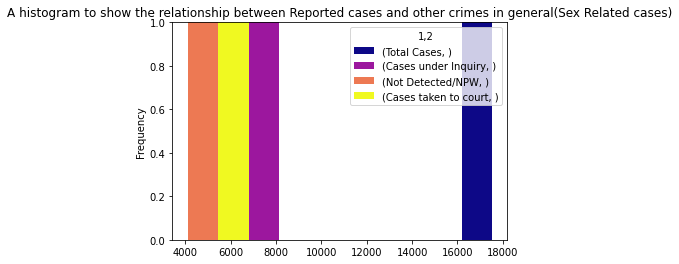

In [54]:
# Ploting an histogram for the sub total under sex related cases
SubTotal.plot.hist(stacked=True, cmap='plasma',xlabel='Number of Cases' ,title='A histogram to show the relationship between Reported cases and other crimes in general(Sex Related cases)')

In [55]:
# Actual Crimes under (a) Sex Related Offences when sub total is removed
reported=reported[0:5]
reported

,1,Total Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court
,2,,,,
S/No.,CASE/CRIME INCIDENCES,,,,
20,Rape,1580,618,318,644
21,Defilement,15366,6166,3615,5585
22,Indecent Assault,396,118,114,164
23,Incest,79,29,34,16
24,Unnatural Offences,100,30,25,45


In [56]:
# Displaying the sum of values of Sex related cases to be ploted on the graph
ByCat=reported.sum(axis=1)
ByCat

S/No.  CASE/CRIME INCIDENCES
20     Rape                      3160
21     Defilement               30732
22     Indecent Assault           792
23     Incest                     158
24     Unnatural Offences         200
dtype: int64

<AxesSubplot:title={'center':'A bar graph showing Cases under Sex related offences'}, xlabel='Sex Related Cases)', ylabel='Number of CRIME INCIDENCES'>

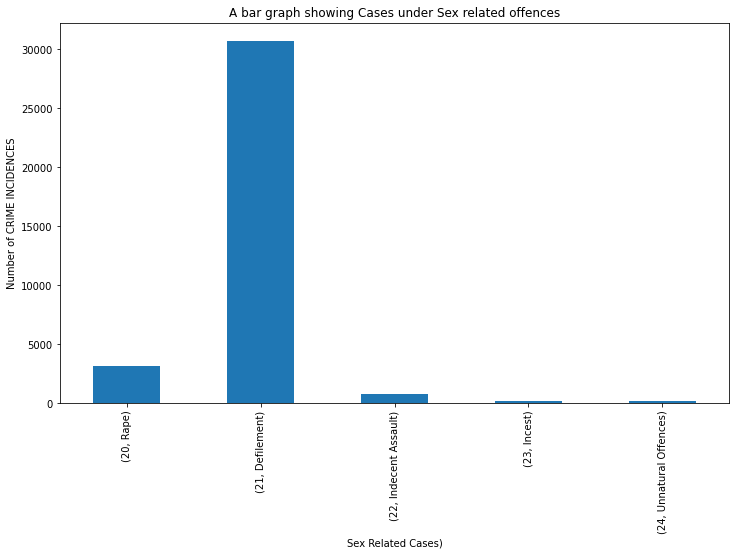

In [57]:
#Bargraph for Assaults
ByCat.plot.bar(figsize=(12,7),title='A bar graph showing Cases under Sex related offences',ylabel='Number of CRIME INCIDENCES',xlabel='Sex Related Cases)')

Defilement has the highest number of cases reported as opposed to rape, indecent assult, Unatural offences and incest respectively

In [58]:
#Determining the correlation of the  Sex Related by Cases convicted
reported.corr()

,1,Total Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court
,2,,,,
1,2,,,,
Total Cases,,1.000000,0.999985,0.999821,0.999918
Cases under Inquiry,,0.999985,1.000000,0.999792,0.999880
Not Detected/NPW,,0.999821,0.999792,1.000000,0.999524
Cases taken to court,,0.999918,0.999880,0.999524,1.000000


In [59]:
#Describing the Sex Related by reported cases
reported.describe()

1,Total Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court
2,,,,
count,5.000000,5.000000,5.000000,5.000000
mean,3504.200000,1392.200000,821.200000,1290.800000
std,6659.322878,2679.833987,1566.227857,2413.778925
min,79.000000,29.000000,25.000000,16.000000
25%,100.000000,30.000000,34.000000,45.000000
50%,396.000000,118.000000,114.000000,164.000000
75%,1580.000000,618.000000,318.000000,644.000000
max,15366.000000,6166.000000,3615.000000,5585.000000


In [60]:
#Accused charged in child related offences on a line graph
reported.iplot(kind='line',title='A line graph showing the relationship amongst Sex related offence')

In [61]:
# Plotting a bar graph for Sex related offences 
reported.iplot(kind='bar',title='A bar graph showing the relationship amongst Sex related offences')

Cases under inquiry for defilement are the highest followed by that of rape, indecent Assault, unnatural offences and incest being least

Cases not detected/NPW for defilement still holds the highest records

Cases taken to court is highest for defilement

# 4. SENTENCES IMPOSED BY COURTS¶

### 4a) IMPRISONMENT¶

In [62]:
#Sentence imposed by the court by imprisonment
df = dcf['SENTENCES IMPOSED BY COURTS']['IMPRISONMENT']
df

2                                                  Male Adult Male Juven.  \
S/No. CASE/CRIME INCIDENCES                                                 
      HOMICIDES                                                             
1     Death  (by shooting)                                  4           0   
2     Death (by mob action)                                 3           0   
3     Death (Poisoning)                                     0           0   
4     Death (Aggravated Domestic Violence)                  3           1   
5     Death(Fire Out Breaks)                                0           0   
8     Other Death (Not Specified above)                    26           1   
      Sub Total(Homicides)                                 36           2   
      ECONOMIC CRIMES                                                       
9     Embezzlement                                          4           0   
10    Causing Financial losss                               0           0   
11    Abuse of office                                      -1           0   
12    Counterfeiting                                       26           0   
13    Forgeries & Uttering of Documents                    37           0   
14    Issuing False Cheques                                 2           0   
15    Bank and Other Corporate Frauds                       0           0   
16    Obtaining By False Pretences                        491           1   
17    Cyber (Computer) crimes                               1           0   
18    Land Frauds                                           4           0   
19    Other Economic crimes                                 4           0   
      Sub Total(Economic crimes)                          568           1   
      GENERAL CRIMES                                                        
      (a) Sex Related Offences                                              
20    Rape                                                 11           0   
21    Defilement                                          571          10   
22    Indecent Assault                                     43           2   
23    Incest                                                5           0   
24    Unnatural Offences                                    4           0   
      Sub Total(Sex Related)                              634          12   
      (b) Child Related Offences                                            
25    Child Neglect                                        52           0   
26    Child Desertion                                      15           0   
27    Child Stealing                                        5           0   
28    Child Trafficking                                     0           0   
29    Child Abduction/Kidnap                                8           0   
31    Child Abuse/Torture                                  10           0   
32    Infanticide                                           1           0   
33    Abortion                                             -1           0   
      Sub Total(Child Related)                             90           0   
      (c ) Breakings                                                        
34    Burglaries                                          735           9   
35    House Breakings                                     355           4   
36    Shop Breaking                                       226           5   
37    Office Breaking                                      29           1   
38    Other Breakings (garage ,etc )                      179           4   
      Sub Total(Breakings)                               1524          23   
      (d) Thefts                                                            
39    Theft of Motor Vehicles                              40           0   
40    Theft of Motor Cycles                               301           4   
41    Theft from M/Vs (Spares)                             79           1

In [63]:
# importing imprisonment under General Crimes
imprisonment=df[22:94]
imprisonment

2                                                  Male Adult Male Juven.  \
S/No. CASE/CRIME INCIDENCES                                                 
      (a) Sex Related Offences                                              
20    Rape                                                 11           0   
21    Defilement                                          571          10   
22    Indecent Assault                                     43           2   
23    Incest                                                5           0   
24    Unnatural Offences                                    4           0   
      Sub Total(Sex Related)                              634          12   
      (b) Child Related Offences                                            
25    Child Neglect                                        52           0   
26    Child Desertion                                      15           0   
27    Child Stealing                                        5           0   
28    Child Trafficking                                     0           0   
29    Child Abduction/Kidnap                                8           0   
31    Child Abuse/Torture                                  10           0   
32    Infanticide                                           1           0   
33    Abortion                                             -1           0   
      Sub Total(Child Related)                             90           0   
      (c ) Breakings                                                        
34    Burglaries                                          735           9   
35    House Breakings                                     355           4   
36    Shop Breaking                                       226           5   
37    Office Breaking                                      29           1   
38    Other Breakings (garage ,etc )                      179           4   
      Sub Total(Breakings)                               1524          23   
      (d) Thefts                                                            
39    Theft of Motor Vehicles                              40           0   
40    Theft of Motor Cycles                               301           4   
41    Theft from M/Vs (Spares)                             79           1   
42    Theft from M/Vs (property)                           48           0   
43    Theft of Bicycles                                   139           5   
44    Theft of Computers(Laptops)                          53           1   
45    Thefts of Mobile Phones                             468          12   
46    Theft of Bank Cash in Transit                         9           0   
47    Thefts of Cash                                      502           6   
48    Cattle Stealing                                     976           8   
49    Theft of Telecom,Electrical & Comm Items             10           0   
50    Theft of Railway Slippers/Material                    0           0   
51    Receiving & Retaining(Stolen Prop)                   53           0   
52    Theft (property snatching-Bags,Neckless,etc)         16           1   
53    Theft of all  kinds (General )                     3736         100   
      Sub Total(Thefts)                                  6430         138   
      (e) Robberies                                                         
54    Aggravated Robbery(Motor Cycles)                      2           0   
55    Aggravated Robbery(Motor Vehicles)                    0           0   
56    Aggravated Robbery(Cash)                              1           0   
57    Aggravated   Robbery(general)                        30           0   
58    Cattle Rustling                                                       
59    Simple Robbery(general)                             262           8   
      Sub Total(Robberies)                                295           8   
      (f) Assaults                                                       

In [64]:
#Selecting from Male Adult till COMM.WORK
imprisonment=imprisonment.loc[:,'Male Adult':'COMM. WORK']
imprisonment

2                                                  Male Adult Male Juven.  \
S/No. CASE/CRIME INCIDENCES                                                 
      (a) Sex Related Offences                                              
20    Rape                                                 11           0   
21    Defilement                                          571          10   
22    Indecent Assault                                     43           2   
23    Incest                                                5           0   
24    Unnatural Offences                                    4           0   
      Sub Total(Sex Related)                              634          12   
      (b) Child Related Offences                                            
25    Child Neglect                                        52           0   
26    Child Desertion                                      15           0   
27    Child Stealing                                        5           0   
28    Child Trafficking                                     0           0   
29    Child Abduction/Kidnap                                8           0   
31    Child Abuse/Torture                                  10           0   
32    Infanticide                                           1           0   
33    Abortion                                             -1           0   
      Sub Total(Child Related)                             90           0   
      (c ) Breakings                                                        
34    Burglaries                                          735           9   
35    House Breakings                                     355           4   
36    Shop Breaking                                       226           5   
37    Office Breaking                                      29           1   
38    Other Breakings (garage ,etc )                      179           4   
      Sub Total(Breakings)                               1524          23   
      (d) Thefts                                                            
39    Theft of Motor Vehicles                              40           0   
40    Theft of Motor Cycles                               301           4   
41    Theft from M/Vs (Spares)                             79           1   
42    Theft from M/Vs (property)                           48           0   
43    Theft of Bicycles                                   139           5   
44    Theft of Computers(Laptops)                          53           1   
45    Thefts of Mobile Phones                             468          12   
46    Theft of Bank Cash in Transit                         9           0   
47    Thefts of Cash                                      502           6   
48    Cattle Stealing                                     976           8   
49    Theft of Telecom,Electrical & Comm Items             10           0   
50    Theft of Railway Slippers/Material                    0           0   
51    Receiving & Retaining(Stolen Prop)                   53           0   
52    Theft (property snatching-Bags,Neckless,etc)         16           1   
53    Theft of all  kinds (General )                     3736         100   
      Sub Total(Thefts)                                  6430         138   
      (e) Robberies                                                         
54    Aggravated Robbery(Motor Cycles)                      2           0   
55    Aggravated Robbery(Motor Vehicles)                    0           0   
56    Aggravated Robbery(Cash)                              1           0   
57    Aggravated   Robbery(general)                        30           0   
58    Cattle Rustling                                                       
59    Simple Robbery(general)                             262           8   
      Sub Total(Robberies)                                295           8   
      (f) Assaults                                                       

In [65]:
summs=imprisonment[1:7].astype(int)
summs

,2,Male Adult,Male Juven.,Female Adult,Female Juven.,Death,Fined,Probation Bound Over,CAUTION,COMM. WORK
S/No.,CASE/CRIME INCIDENCES,,,,,,,,,
20,Rape,11,0,0,0,0,0,1,0,1
21,Defilement,571,10,4,3,0,40,0,191,132
22,Indecent Assault,43,2,1,0,0,0,0,5,6
23,Incest,5,0,3,0,0,0,0,0,0
24,Unnatural Offences,4,0,0,0,0,0,0,1,0
,Sub Total(Sex Related),634,12,8,3,0,40,1,197,139


In [66]:
# Actual Crimes under (g) Sentence imposed by courts by removing sub total from the list
summ=summs[0:5]
summ

,2,Male Adult,Male Juven.,Female Adult,Female Juven.,Death,Fined,Probation Bound Over,CAUTION,COMM. WORK
S/No.,CASE/CRIME INCIDENCES,,,,,,,,,
20,Rape,11,0,0,0,0,0,1,0,1
21,Defilement,571,10,4,3,0,40,0,191,132
22,Indecent Assault,43,2,1,0,0,0,0,5,6
23,Incest,5,0,3,0,0,0,0,0,0
24,Unnatural Offences,4,0,0,0,0,0,0,1,0


In [67]:
# Displaying the sum of values of other crimes to be ploted on the graph
ByCat=summ.sum(axis=1)
ByCat

S/No.  CASE/CRIME INCIDENCES
20     Rape                      13
21     Defilement               951
22     Indecent Assault          57
23     Incest                     8
24     Unnatural Offences         5
dtype: int64

<AxesSubplot:title={'center':'A bar graph showing Imprisonment by courts(imprisonment) under Sex Related Offences '}, xlabel='Category(Sex Related Offences )', ylabel='Number of CRIME INCIDENCES'>

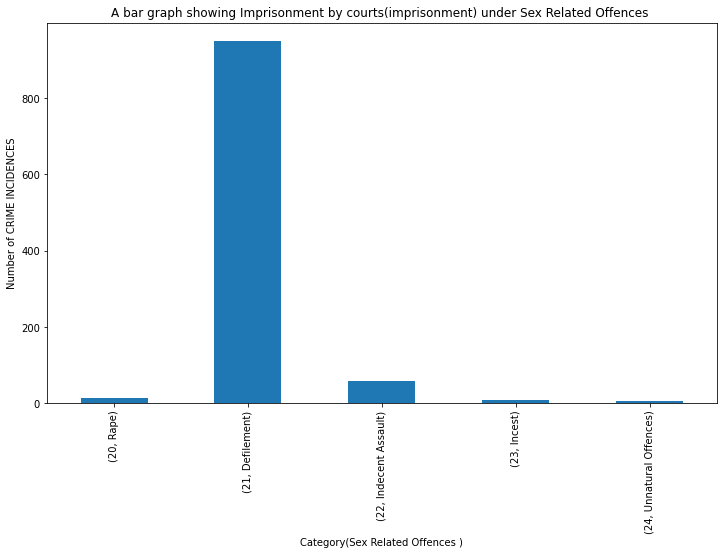

In [68]:
#Bargraph for Sex related cases
ByCat.plot.bar(figsize=(12,7),title='A bar graph showing Imprisonment by courts(imprisonment) under Sex Related Offences ',ylabel='Number of CRIME INCIDENCES',xlabel='Category(Sex Related Offences )')

From the above graph, defilement victims imprisoned by the court were exceeding high in 2018

In [69]:
#Determining the correlation of the (Sex Related Offences 
summ.corr()

2,Male Adult,Male Juven.,Female Adult,Female Juven.,Death,Fined,Probation Bound Over,CAUTION,COMM. WORK
2,,,,,,,,,
Male Adult,1.000000,0.990462,0.734263,0.997941,NaN,0.997941,-0.260157,0.999122,0.999768
Male Juven.,0.990462,1.000000,0.723667,0.979850,NaN,0.979850,-0.309426,0.984321,0.987364
Female Adult,0.734263,0.723667,1.000000,0.738549,NaN,0.738549,-0.492366,0.736707,0.735516
Female Juven.,0.997941,0.979850,0.738549,1.000000,NaN,1.000000,-0.250000,0.999704,0.999089
Death,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fined,0.997941,0.979850,0.738549,1.000000,NaN,1.000000,-0.250000,0.999704,0.999089
Probation Bound Over,-0.260157,-0.309426,-0.492366,-0.250000,NaN,-0.250000,1.000000,-0.259818,-0.256964
CAUTION,0.999122,0.984321,0.736707,0.999704,NaN,0.999704,-0.259818,1.000000,0.999780
COMM. WORK,0.999768,0.987364,0.735516,0.999089,NaN,0.999089,-0.256964,0.999780,1.000000


In [70]:
#Describing the imprisonment under General Crimes Sex Related Offences 
summ.describe()

2,Male Adult,Male Juven.,Female Adult,Female Juven.,Death,Fined,Probation Bound Over,CAUTION,COMM. WORK
count,5.000000,5.000000,5.00000,5.000000,5.0,5.000000,5.000000,5.000000,5.000000
mean,126.800000,2.400000,1.60000,0.600000,0.0,8.000000,0.200000,39.400000,27.800000
std,248.827651,4.335897,1.81659,1.341641,0.0,17.888544,0.447214,84.772047,58.302659
min,4.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,11.000000,0.000000,1.00000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000
75%,43.000000,2.000000,3.00000,0.000000,0.0,0.000000,0.000000,5.000000,6.000000
max,571.000000,10.000000,4.00000,3.000000,0.0,40.000000,1.000000,191.000000,132.000000


In [71]:
# Line graph for the Data stored in variable ActualAccusedconvicted
summ.iplot(kind='line',title='A line graph showing the relationship amongst Sex Related by the imprisonement.')

In [72]:
# Plotting a bar graph for ActualOtherCrimes
summ.iplot(kind='bar',title='A bar graph showing the relationship amongst Sex Related Offences by imprisonement')

The male Adults imprisoned in year 2018 was exceedingly high as compared to those of rape and other grievences

Caution given to Defilement cases were at almost in clocking 200

Incest and natural offences were less likely to occur in the year 2018

In [73]:
# Determining the percentage
s=summ.sum(axis=1)
summ.apply(lambda x: 100 * (x /s)).fillna(0).round(2)

,2,Male Adult,Male Juven.,Female Adult,Female Juven.,Death,Fined,Probation Bound Over,CAUTION,COMM. WORK
S/No.,CASE/CRIME INCIDENCES,,,,,,,,,
20,Rape,84.62,0.00,0.00,0.00,0.0,0.00,7.69,0.00,7.69
21,Defilement,60.04,1.05,0.42,0.32,0.0,4.21,0.00,20.08,13.88
22,Indecent Assault,75.44,3.51,1.75,0.00,0.0,0.00,0.00,8.77,10.53
23,Incest,62.50,0.00,37.50,0.00,0.0,0.00,0.00,0.00,0.00
24,Unnatural Offences,80.00,0.00,0.00,0.00,0.0,0.00,0.00,20.00,0.00


# 4b) SENTENCES IMPOSED BY COURTS','VICTIMS OF CRIME

In [74]:
#Sentence imposed by the court on victims of crimes
VCT = dcf['SENTENCES IMPOSED BY COURTS']['VICTIMS OF CRIME']
VCT

2                                                  Male Adult Male Juven.  \
S/No. CASE/CRIME INCIDENCES                                                 
      HOMICIDES                                                             
1     Death  (by shooting)                                197           4   
2     Death (by mob action)                               619          11   
3     Death (Poisoning)                                    65           9   
4     Death (Aggravated Domestic Violence)                174          25   
5     Death(Fire Out Breaks)                               16          24   
8     Other Death (Not Specified above)                  2475         192   
      Sub Total(Homicides)                               3546         265   
      ECONOMIC CRIMES                                                       
9     Embezzlement                                        178           0   
10    Causing Financial losss                              56           0   
11    Abuse of office                                      44           0   
12    Counterfeiting                                      416           3   
13    Forgeries & Uttering of Documents                   713           3   
14    Issuing False Cheques                               283           0   
15    Bank and Other Corporate Frauds                      15           0   
16    Obtaining By False Pretences                       9525           9   
17    Cyber (Computer) crimes                             149           0   
18    Land Frauds                                         272           0   
19    Other Economic crimes                               124           0   
      Sub Total(Economic crimes)                        11775          15   
      GENERAL CRIMES                                                        
      (a) Sex Related Offences                                              
20    Rape                                                  0           0   
21    Defilement                                            0         228   
22    Indecent Assault                                      2           8   
23    Incest                                               34           1   
24    Unnatural Offences                                   51          40   
      Sub Total(Sex Related)                               87         277   
      (b) Child Related Offences                                            
25    Child Neglect                                         0        4755   
26    Child Desertion                                       0        1585   
27    Child Stealing                                        0         108   
28    Child Trafficking                                     0          29   
29    Child Abduction/Kidnap                                0         214   
31    Child Abuse/Torture                                   0         931   
32    Infanticide                                           0          34   
33    Abortion                                              0          19   
      Sub Total(Child Related)                              0        7675   
      (c ) Breakings                                                        
34    Burglaries                                         5126          54   
35    House Breakings                                    2482          20   
36    Shop Breaking                                      1623          11   
37    Office Breaking                                     369           1   
38    Other Breakings (garage ,etc )                     1051           3   
      Sub Total(Breakings)                              10650          89   
      (d) Thefts                                                            
39    Theft of Motor Vehicles                            1064           1   
40    Theft of Motor Cycles                              4278          15   
41    Theft from M/Vs (Spares)                            961           5

In [75]:
# importing Victims under Sex Related Cases
victims=VCT[22:94]
victims

2                                                  Male Adult Male Juven.  \
S/No. CASE/CRIME INCIDENCES                                                 
      (a) Sex Related Offences                                              
20    Rape                                                  0           0   
21    Defilement                                            0         228   
22    Indecent Assault                                      2           8   
23    Incest                                               34           1   
24    Unnatural Offences                                   51          40   
      Sub Total(Sex Related)                               87         277   
      (b) Child Related Offences                                            
25    Child Neglect                                         0        4755   
26    Child Desertion                                       0        1585   
27    Child Stealing                                        0         108   
28    Child Trafficking                                     0          29   
29    Child Abduction/Kidnap                                0         214   
31    Child Abuse/Torture                                   0         931   
32    Infanticide                                           0          34   
33    Abortion                                              0          19   
      Sub Total(Child Related)                              0        7675   
      (c ) Breakings                                                        
34    Burglaries                                         5126          54   
35    House Breakings                                    2482          20   
36    Shop Breaking                                      1623          11   
37    Office Breaking                                     369           1   
38    Other Breakings (garage ,etc )                     1051           3   
      Sub Total(Breakings)                              10650          89   
      (d) Thefts                                                            
39    Theft of Motor Vehicles                            1064           1   
40    Theft of Motor Cycles                              4278          15   
41    Theft from M/Vs (Spares)                            961           5   
42    Theft from M/Vs (property)                          508           0   
43    Theft of Bicycles                                   898          16   
44    Theft of Computers(Laptops)                         606           2   
45    Thefts of Mobile Phones                            4150          57   
46    Theft of Bank Cash in Transit                        20           0   
47    Thefts of Cash                                     4805          26   
48    Cattle Stealing                                    5669          15   
49    Theft of Telecom,Electrical & Comm Items            103           1   
50    Theft of Railway Slippers/Material                   14           0   
51    Receiving & Retaining(Stolen Prop)                  366           0   
52    Theft (property snatching-Bags,Neckless,etc)         55           0   
53    Theft of all  kinds (General )                    23117         209   
      Sub Total(Thefts)                                 46614         347   
      (e) Robberies                                                         
54    Aggravated Robbery(Motor Cycles)                    451           1   
55    Aggravated Robbery(Motor Vehicles)                   89           0   
56    Aggravated Robbery(Cash)                            326           2   
57    Aggravated   Robbery(general)                      1013           3   
58    Cattle Rustling                                                       
59    Simple Robbery(general)                            3941          42   
      Sub Total(Robberies)                               5821          48   
      (f) Assaults                                                       

In [76]:
Vc=victims[1:7].astype(int)
Vc

,2,Male Adult,Male Juven.,Female Adult,Female Juven.
S/No.,CASE/CRIME INCIDENCES,,,,
20,Rape,0,0,1485,0
21,Defilement,0,228,0,15366
22,Indecent Assault,2,8,293,93
23,Incest,34,1,57,10
24,Unnatural Offences,51,40,15,0
,Sub Total(Sex Related),87,277,1849,15469


In [77]:
# Actual Crimes under (g) Sentence imposed by courts by removing sub total from the list
summ=Vc[0:5]
summ

,2,Male Adult,Male Juven.,Female Adult,Female Juven.
S/No.,CASE/CRIME INCIDENCES,,,,
20,Rape,0,0,1485,0
21,Defilement,0,228,0,15366
22,Indecent Assault,2,8,293,93
23,Incest,34,1,57,10
24,Unnatural Offences,51,40,15,0


In [78]:
# Plotting a bar graph for victims of crimes
summ.iplot(kind='bar',title='A bar graph showing the relationship amongst victims of crimest')

The female juven have the highest probability of being sexually harrased in defilement Cases

In [79]:
#Describing the Victims of crimes under General Crimes Sex Related Offences 
summ.describe()

2,Male Adult,Male Juven.,Female Adult,Female Juven.
count,5.000000,5.000000,5.000000,5.000000
mean,17.400000,55.400000,370.000000,3093.800000
std,23.702321,97.856017,634.438334,6860.479444
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,15.000000,0.000000
50%,2.000000,8.000000,57.000000,10.000000
75%,34.000000,40.000000,293.000000,93.000000
max,51.000000,228.000000,1485.000000,15366.000000


#  Final Conclusions

1. Male Adults are the most responsible for defilement cases reported to court. Most victims of defilement cases are the female juven.
2. The Performance of court so slow in taking actions to cases especially defilement, that is reported to them


In [80]:
#End